In [15]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans


In [28]:
#open dataset.csv
df = pd.read_csv('dataset/dataset.csv')

In [17]:
#view number of rows and columns
#print(df.shape)
#view first 5 rows
#display(df.head(10))

In [19]:
#plot the number of tweet to every year from created_at column and geo.country column
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['year'] = df['created_at'].dt.year
#df['year'].value_counts().sort_index().plot(kind='bar')
#plt.title('Number of tweets to every year')
#plt.xlabel('Year')
#plt.ylabel('Number of tweets')
#plt.show()



In [29]:
continent_mapping = {
    'Africa': ['NG', 'ZA', 'EG', 'KE', 'DZ', 'MA', 'ET', 'TZ', 'GH', 'AO',
               'CI', 'CM', 'TN', 'UG', 'MZ', 'SN', 'MG', 'ZM', 'SD', 'ZW',
               'NA', 'MW', 'BW', 'ML', 'MR'],
    'Asia': ['CN', 'IN', 'ID', 'PK', 'BD', 'JP', 'PH', 'VN', 'TR', 'IR',
             'TH', 'MM', 'KR', 'IQ', 'AF', 'SA', 'UZ', 'YE', 'NP', 'MY',
             'LK', 'KP', 'KZ', 'SY', 'KH'],
    'Europe': ['RU', 'DE', 'GB', 'FR', 'IT', 'ES', 'UA', 'PL', 'RO',
               'NL', 'BE', 'GR', 'PT', 'CZ', 'HU', 'SE', 'BY', 'AT',
               'CH', 'BG', 'RS', 'DK', 'FI', 'SK', 'NO'],
    'North America': ['US', 'CA', 'MX', 'CU', 'HT', 'DO', 'JM', 'HN',
                      'SV', 'CR', 'NI', 'PA', 'GT', 'BS', 'TT', 'BZ',
                      'BB', 'HT', 'KN', 'AG', 'DM', 'LC', 'VC', 'GD'],
    'Oceania': ['AU', 'PG', 'NZ', 'FJ', 'SB', 'WS', 'FM', 'VU', 'KI',
                'TO', 'PW', 'MH', 'NR', 'TV', 'NU', 'CK', 'KI', 'AS',
                'TK', 'WF', 'PN', 'PF', 'GU', 'NR', 'TV']
}

inverted_mapping = {code: continent for continent, codes in continent_mapping.items() for code in codes}
df['Continent'] = df['geo.country_code'].map(inverted_mapping)
#display(df['Continent'])

#### Primo crollo 18/05/2020

In [30]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_1 = df[(df['created_at'] >= '2021-05-07') & (df['created_at'] <= '2021-05-19')]
df_1 = df_1.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_1 = df_1.reset_index(drop=True)
display (df_1.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,Continent
0,1391523807148527620,2021-05-09T22:41:43.000Z,SpaceX launching satellite Doge-1 to the moon ...,44196397,elonmusk,Elon Musk,127829693,113945,True,1391523807148527620,...,NaN,NaN,en,508942,15749,34035,106990,NaN,replied_to,NaN
1,1392602041025843203,2021-05-12T22:06:14.000Z,Tesla &amp; Bitcoin https://t.co/YSswJmVZhP,44196397,elonmusk,Elon Musk,127829642,113945,True,1392602041025843203,...,NaN,NaN,en,472939,50315,115370,70428,NaN,quoted,NaN
2,1392950720979030019,2021-05-13T21:11:46.000Z,"To be clear, I strongly believe in crypto, but...",44196397,elonmusk,Elon Musk,127829842,113945,True,1392950720979030019,...,NaN,NaN,en,347559,8152,54190,32174,NaN,quoted,NaN
3,1390522866979033092,2021-05-07T04:24:20.000Z,"Cryptocurrency is promising, but please invest...",44196397,elonmusk,Elon Musk,127831360,113945,True,1390522866979033092,...,NaN,NaN,en,210248,4617,17455,35113,NaN,quoted,NaN
4,1394170030741413888,2021-05-17T05:56:52.000Z,"@BTC_Archive To clarify speculation, Tesla has...",44196397,elonmusk,Elon Musk,127829868,113945,True,1394051036462071808,...,NaN,NaN,en,95142,7196,16689,16177,"[{""type"": ""replied_to"", ""id"": ""139405103646207...",replied_to,NaN
5,1393939232373280769,2021-05-16T14:39:45.000Z,just let her enjoy astrology dude u like talki...,2845917028,bocxtop,first-mate prance,286017,250,True,1393939232373280769,...,NaN,NaN,en,91726,459,126,11378,NaN,quoted,NaN
6,1392657323965829123,2021-05-13T01:45:55.000Z,Elon probably did not research how much energy...,902926941413453824,cz_binance,CZ 🔶 Binance,8134037,27699,True,1392657323965829123,...,NaN,NaN,en,59828,1247,5000,11388,"[{""type"": ""quoted"", ""id"": ""1392602041025843203...",replied_to,NaN
7,1394625128257007618,2021-05-18T12:05:16.000Z,MicroStrategy has purchased an additional 229 ...,244647486,saylor,Michael Saylor⚡️,2931889,16772,True,1394625128257007618,...,NaN,NaN,en,57116,2096,3520,9895,NaN,replied_to,NaN
8,1394005523083653120,2021-05-16T19:03:10.000Z,"I don’t get how Elon can run 4 companies, have...",1229475301945683969,juicecrypt0,Juice,4254,29,False,1394005523083653120,...,NaN,NaN,en,47124,750,1257,5968,NaN,quoted,NaN
9,1393995872413888518,2021-05-16T18:24:49.000Z,@ChainLinkGod @PeterMcCormack Hey cryptocurren...,44196397,elonmusk,Elon Musk,127829978,113945,True,1393971202738302986,...,NaN,NaN,en,44812,2700,7130,6267,"[{""type"": ""replied_to"", ""id"": ""139399397501974...",replied_to,NaN


In [6]:
#plot the number of tweet in every day from created_at between 2021/05/11 to 2021/05/24
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['day'] = df['created_at'].dt.day
#df['day'].value_counts().sort_index().plot(kind='bar')
#plt.title('Number of tweets in every day')
#plt.xlabel('Day')
#plt.ylabel('Number of tweets')
#plt.show()



In [7]:
#create a plot with the id of twitter and the number of likes, retweets and replies
#df=pd.DataFrame(df,columns=["id","public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"])
#df.plot(x="id", y=["public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"], kind="bar")
#plt.title('')
#plt.xlabel('Id')
#plt.ylabel('Number of likes, replies and retweets')
#plt.show()



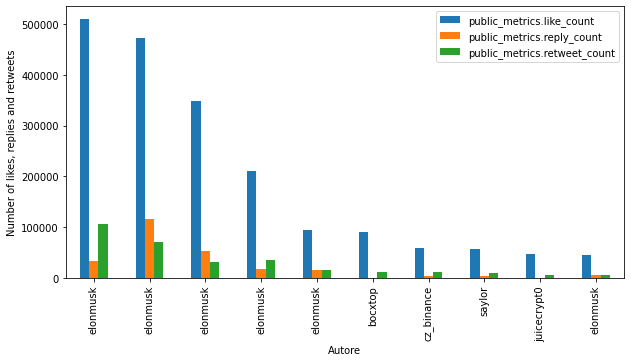

In [33]:
df_1=pd.DataFrame(df_1,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count', 'geo.country_code'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_1.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


In [34]:
### OBIETTIVO 4 ###
# Suddivisione del dataset per continente
df_1['Continent'] = df_1['geo.country_code'].map(inverted_mapping)
grouped = df_1.groupby('Continent')

for continent, data in grouped:
    # Suddivisione del dataset per paese all'interno del continente corrente
    country_grouped = data.groupby('geo.country')

    # Calcolo delle somme dei like, commenti e retweet per ogni paese nel continente
    likes_sum = country_grouped['public_metrics.like_count'].sum()
    reply_sum = country_grouped['public_metrics.reply_count'].sum()
    retweet_sum = country_grouped['public_metrics.retweet_count'].sum()

    # Creazione delle posizioni delle barre per il grafico
    bar_width = 0.3
    index = np.arange(len(likes_sum.index))

    # Creazione del grafico a barre raggruppate
    plt.figure(figsize=(12, 6))
    plt.bar(index, likes_sum.values, width=bar_width, label='Like')
    plt.bar(index + bar_width, reply_sum.values, width=bar_width, label='Commenti')
    plt.bar(index + 2 * bar_width, retweet_sum.values, width=bar_width, label='Retweet')

    # Configurazione del grafico
    plt.title(f'Interazioni per paese - {continent}')
    plt.xlabel('Paese')
    plt.ylabel('Interazioni')
    plt.xticks(index, likes_sum.index,rotation='vertical')
    plt.legend()

    # Visualizzazione del grafico per il continente corrente
    plt.show()


KeyError: 'geo.country'

#### Incremento valore 22/09/2021 04/10/2021

In [9]:
#select the rows with into the text column there are #bitcoin #luna #terra
df_2 = df[df['text'].str.contains('#lunaterra|#luna|#terra|#bitcoin|#blockchain|#crypto|#Crypto|#cryptocurre|#criptonews|#terraUSD|bitcoin|blockchain|crypto|cryptocurre|#stablecoin|stablecoin Terra', na=False, case=False)]
df_2 = df_2.reset_index(drop=True)


In [10]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_2 = df_2[(df_2['created_at'] >= '2021-09-22') & (df_2['created_at'] <= '2021-10-04')]
df_2 = df_2.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_2 = df_2.reset_index(drop=True)
display (df_2.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1441416830485073924,2021-09-24 14:58:47+00:00,crypto is illegal and elon mucks gf broke up w...,36195015,BronzeHammer,John Hamburger Jr,58018,358,True,1441416830485073924,...,NaN,NaN,en,61470,284,133,7425,NaN,quoted,2021
1,1442949756993490945,2021-09-28 20:30:05+00:00,First steps...\n\n🌋#Bitcoin🇸🇻 https://t.co/duh...,20736511,nayibbukele,Nayib Bukele,4665548,4024,True,1442949756993490945,...,NaN,NaN,en,56368,2758,3268,11812,NaN,quoted,2021
2,1441846960332361730,2021-09-25 19:27:58+00:00,2.1 million Salvadorans are ACTIVELY USING @ch...,20736511,nayibbukele,Nayib Bukele,4665552,4024,True,1441846960332361730,...,NaN,NaN,en,39262,945,1881,7064,NaN,quoted,2021
3,1441398415712129024,2021-09-24 13:45:36+00:00,"China’s authoritarian crackdown on crypto, inc...",221162525,SenToomey,Senator Pat Toomey,191243,3021,True,1441398415712129024,...,NaN,NaN,en,38743,934,1957,7879,NaN,replied_to,2021
4,1441387389876723716,2021-09-24 13:01:48+00:00,🔍 New #Airdrop: Dr. Skull\n\n💲 Reward: Up to $...,1424243939716960260,DrSkull6,Dr. Skull,59298,9,False,1441387389876723716,...,NaN,NaN,en,34952,9410,7304,31834,NaN,replied_to,2021
5,1443629579416002567,2021-09-30 17:31:27+00:00,The United States has no intention to ban #Bit...,244647486,saylor,Michael Saylor⚡️,2931933,16774,True,1443629579416002567,...,NaN,NaN,en,33236,875,1376,7970,NaN,replied_to,2021
6,1444183509740883968,2021-10-02 06:12:35+00:00,💥 𝐓𝐇𝐄 $𝐑𝐄𝐍𝐀 𝐀𝐈𝐑𝐃𝐑𝐎𝐏 💥\nWARENA is giving away i...,1430363118392147968,WarenaOfficial,Warena | Hail To The Community 🤝,160018,306,False,1444183509740883968,...,NaN,NaN,en,31849,9978,6482,36209,NaN,replied_to,2021
7,1441389129665818626,2021-09-24 13:08:42+00:00,Nothing has created more wealth in the past de...,244647486,saylor,Michael Saylor⚡️,2931933,16774,True,1441389129665818626,...,NaN,NaN,en,31250,435,1182,5710,NaN,quoted,2021
8,1443893179196002307,2021-10-01 10:58:54+00:00,"#Bitcoin Sept closing price $43,834 .. like cl...",918804624303382528,100trillionUSD,PlanB,1867992,14653,False,1443893179196002307,...,NaN,NaN,en,31142,372,1540,4672,NaN,quoted,2021
9,1443235379218243591,2021-09-29 15:25:03+00:00,#biticaexchange \n\nHeloo dear all crypto curr...,1423345562896805892,BLOCKBEATSEX,BITICA EXCHANGE,56318,17,False,1443235379218243591,...,NaN,NaN,en,27437,19193,8949,28873,NaN,quoted,2021


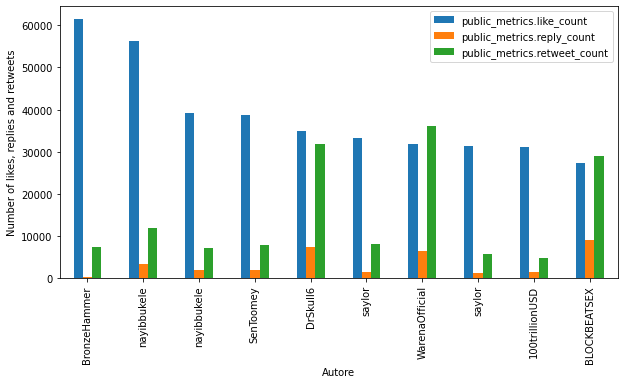

In [11]:
df_2=pd.DataFrame(df_2,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_2.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


#### Crollo 16/01/2022 - 05/02/2022

In [13]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_3 = df[(df['created_at'] >= '2022-02-20') & (df['created_at'] <= '2022-02-25')]
df_3 = df_3.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_3 = df_3.reset_index(drop=True)
display (df_3.head(15))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1496124393361129475,2022-02-22 14:07:06+00:00,Crypto is just the stock market for people who...,70111948,joshgondelman,Josh Gondelman,198901,2174,True,1496124393361129475,...,NaN,NaN,en,69260,491,332,6032,NaN,quoted,2022
1,1495519382247821317,2022-02-20 22:03:00+00:00,"um, stolen? what do you mean? they changed h...",14412937,eevee,eevee ☢️,30374,407,False,1495519382247821317,...,NaN,NaN,en,42879,187,130,7065,"[{""type"": ""quoted"", ""id"": ""1495246939838840840""}]",replied_to,2022
2,1495191977289142273,2022-02-20 00:22:01+00:00,BREAKING: The state of California has introduc...,1291243382128304133,Dennis_Porter_,Dennis Porter,129993,820,False,1495191977289142273,...,NaN,NaN,en,23264,427,923,3672,NaN,quoted,2022
3,1496500783315050496,2022-02-23 15:02:45+00:00,New airdrop: Secretworld (SSD) \nTotal Reward:...,1151153768165076992,airdropinspect,Airdrop Inspector,1564819,1357,False,1496500783315050496,...,NaN,NaN,en,20856,3290,4145,20637,NaN,quoted,2022
4,1495720307264524290,2022-02-21 11:21:25+00:00,Bulgaria Stock Exchange Lists Bitcoin and Ethe...,902926941413453824,cz_binance,CZ 🔶 Binance,8132623,27711,True,1495720307264524290,...,NaN,NaN,en,20378,169,2676,3100,NaN,replied_to,2022
5,1495354888619913217,2022-02-20 11:09:22+00:00,"I bought Bitcoin at 68,900 to hedge against 7%...",509690453,ThinkingBitmex,ChimpZoo 🇸🇦,76334,1220,False,1495354888619913217,...,NaN,NaN,en,19905,344,2171,1213,NaN,replied_to,2022
6,1496849005535498244,2022-02-24 14:06:27+00:00,I never been in the negative since I started t...,20567939,MeekMill,MeekMill,11515734,7796,True,1496849005535498244,...,NaN,NaN,en,19001,833,2069,1305,NaN,replied_to,2022
7,1496972965438709769,2022-02-24 22:19:02+00:00,💙 LastChance #Airdrop is live!\n🏆 Total Airdro...,1385600098793664513,LastChance_auc,🇺🇦 LastChance | #1 Crypto Auctions,21299,6,False,1496972965438709769,...,NaN,NaN,en,18649,5286,6446,17452,NaN,quoted,2022
8,1495403017344016384,2022-02-20 14:20:37+00:00,💧 Epic Meta Airdrop 💧\n\n🏆 Task: ➕ 1...,1173425402523652096,AirdropStario,AirdropStar,1456346,522,False,1495403017344016384,...,NaN,NaN,en,14756,2768,2947,14932,NaN,replied_to,2022
9,1496092822252179456,2022-02-22 12:01:39+00:00,New airdrop: Monopoly Millionaire Game (MMG) \...,1151153768165076992,airdropinspect,Airdrop Inspector,1564819,1357,False,1496092822252179456,...,NaN,NaN,en,14281,2147,2974,14088,NaN,quoted,2022


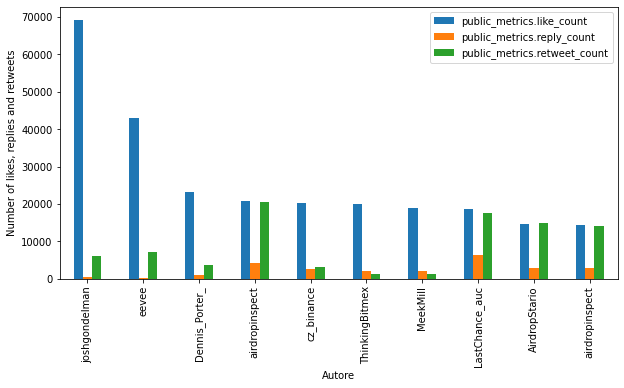

In [14]:
df_3=pd.DataFrame(df_3,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_3.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


#### Crollo 5/05/2022 - 18-05-2022 restringere fino al giorno del crollo

In [15]:
df_4 = df[df['text'].str.contains('#lunaterra|#luna|#terra|#bitcoin|#blockchain|#crypto|#Crypto|#cryptocurre|#criptonews|#terraUSD|bitcoin|blockchain|crypto|cryptocurre|#stablecoin|stablecoin Terra', na=False, case=False)]
df_4 = df_4.reset_index(drop=True)

In [16]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_4 = df_4[(df_4['created_at'] >= '2022-05-08') & (df_4['created_at'] <= '2022-05-15')]
df_4 = df_4.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_4 = df_4.reset_index(drop=True)
display (df_4.head(15))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1525083159725056002,2022-05-13 11:58:54+00:00,Crypto bros yesterday vs. Crypto bros today #w...,1542862735,Ryanair,Ryanair,701591,2243,True,1525083159725056002,...,NaN,NaN,en,231324,4634,2833,23565,NaN,replied_to,2022
1,1524724947460911104,2022-05-12 12:15:30+00:00,"If you invested $100 in Luna one month ago, th...",16877374,paleofuture,Matt Novak,30120,1166,False,1524724947460911104,...,NaN,NaN,en,161564,2306,1056,12208,NaN,replied_to,2022
2,1525123256977612800,2022-05-13 14:38:14+00:00,crypto is an mlm for people who think they're ...,17158189,MikeDrucker,Mike Drucker,206545,2289,True,1525123256977612800,...,NaN,NaN,en,103898,736,676,10230,NaN,replied_to,2022
3,1523742670044413954,2022-05-09 19:12:16+00:00,El Salvador just bought the dip! 🇸🇻\n\n500 coi...,20736511,nayibbukele,Nayib Bukele,4668515,4028,True,1523742670044413954,...,NaN,NaN,en,99887,4092,6144,13362,NaN,quoted,2022
4,1523646766549434373,2022-05-09 12:51:11+00:00,Monday morning is time to get back to work. #B...,244647486,saylor,Michael Saylor⚡️,2932171,16773,True,1523646766549434373,...,NaN,NaN,en,87148,1483,4068,11038,NaN,quoted,2022
5,1525276705144901632,2022-05-14 00:47:59+00:00,"I recently heard ""Crypto is Mary Kay for men""",330105456,indyfromspace,Dr. Sarah Parcak,91208,886,True,1525276705144901632,...,NaN,NaN,en,74877,893,498,9074,NaN,replied_to,2022
6,1524940435659038732,2022-05-13 02:31:46+00:00,1/ I am convinced the disillusioned young men ...,17264476,BriannaWu,Brianna Wu,143240,2722,True,1524940435659038732,...,NaN,NaN,en,65496,1593,1558,8017,NaN,replied_to,2022
7,1523816383443787788,2022-05-10 00:05:11+00:00,What I've learned today:\n\n1 Bitcoin = 1 Bitc...,1356434353623093249,greg16676935420,greg,400811,1240,False,1523816383443787788,...,NaN,NaN,en,40518,312,1011,4469,NaN,quoted,2022
8,1524935730308456448,2022-05-13 02:13:04+00:00,The Terra blockchain has officially halted at ...,1022028994772910086,terra_money,Terra 🌍 Powered by LUNA 🌕,1116423,4829,True,1524935730308456448,...,NaN,NaN,en,34679,1708,10434,7964,NaN,replied_to,2022
9,1525226016972582912,2022-05-13 21:26:34+00:00,A post-mortem on everything that transpired th...,1022028994772910086,terra_money,Terra 🌍 Powered by LUNA 🌕,1116421,4829,True,1525226016972582912,...,NaN,NaN,en,33748,497,9428,7272,NaN,replied_to,2022


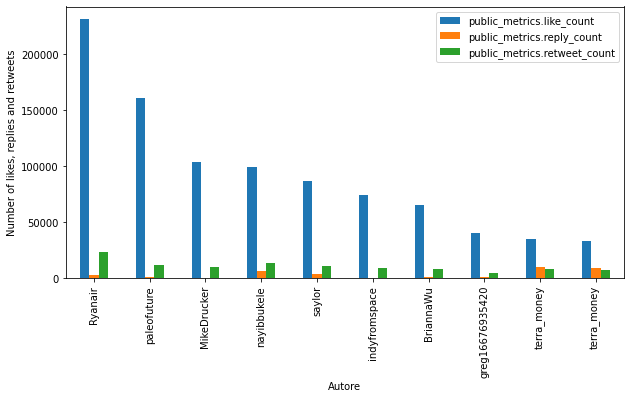

In [17]:
df_4=pd.DataFrame(df_4,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_4.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


#### Obiettivo 2 - Capire il tipo di interazione tra gli utenti

In [18]:
#df_cluster = df[df['text'].str.contains('#lunaterra|#luna|#terra|#bitcoin|#blockchain|#crypto|#Crypto|#cryptocurre|#criptonews|#terraUSD|bitcoin|blockchain|crypto|cryptocurre|#stablecoin|stablecoin Terra', na=False, case=False)]
#take only teet with more than 1000 likes
#df_cluster = df[df['public_metrics.like_count'] >= 1000]


In [24]:
# Caricamento dei dati dal file csv
df = pd.read_csv('dataset/dataset.csv')

# Selezioniamo le feature per l'analisi della frequenza delle interazioni
features = ['public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count', 'created_at']
X = df[features]

# Normalizzazione dei dati
X = (X - X.mean()) / X.std()

# Utilizziamo l'algoritmo k-means per raggruppare i tweet in 5 cluster
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Aggiungiamo i label di cluster al dataframe
df['cluster'] = kmeans.labels_

# Visualizziamo i cluster
plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Numero di like')
plt.ylabel('Numero di commenti')
plt.title('Raggruppamento dei tweet in base alle interazioni')
plt.show()

# Visualizziamo il numero di tweet in ogni cluster
print(df['cluster'].value_counts())

# Visualizziamo le statistiche delle interazioni per ogni cluster
print(df.groupby('cluster')[features].mean())


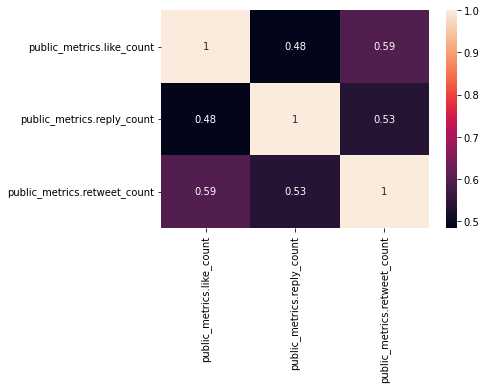

In [21]:
#correlation matrix
#take only public_metrics.like_count, public_metrics.reply_count, public_metrics.retweet_count
df = df[['public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count']]
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [ ]:
df = pd.read_csv('dataset/dataset.csv')

Media di likes per tweet: 129.50382947573058
Media di retweets per tweet: 62.723507359234304
Media di commenti per tweet: 34.801099583902726
Tasso di interazione: 22702.84364188676


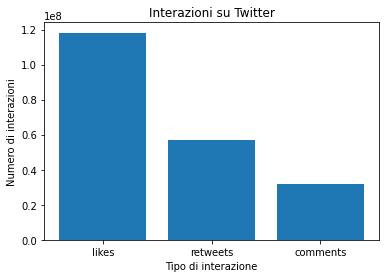

In [ ]:
df_means = df[['public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count', 'created_at']]
# calcola la media delle interazioni per tweet
mean_likes = df_means['public_metrics.like_count'].mean()
mean_retweets = df_means['public_metrics.retweet_count'].mean() 
mean_comments = df_means['public_metrics.reply_count'].mean()

# calcola il tasso di interazione
total_tweets = len(df_means.index)
total_interactions = df_means['public_metrics.like_count'].sum() + df_means['public_metrics.retweet_count'].sum() + df_means['public_metrics.reply_count'].sum()
interaction_rate = total_interactions / total_tweets * 100

# stampa le metriche
print("Media di likes per tweet:", mean_likes)
print("Media di retweets per tweet:", mean_retweets)
print("Media di commenti per tweet:", mean_comments)
print("Tasso di interazione:", interaction_rate)

# crea un grafico a barre delle interazioni per tweet
interactions = ['likes', 'retweets', 'comments']
values = [df_means['public_metrics.like_count'].sum(), df_means['public_metrics.retweet_count'].sum(), df_means['public_metrics.reply_count'].sum()]
plt.bar(interactions, values)
plt.xlabel("Tipo di interazione")
plt.ylabel("Numero di interazioni")
plt.title("Interazioni su Twitter")
plt.show()


In [ ]:
# seleziona solo alcune colonne del dataframe
df = df[['id', 'public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count', 'created_at']]

# converte la colonna 'created_at' in formato datetime e imposta come indice
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df.set_index('created_at', inplace=True)

# rimuove le righe con valori null nella colonna 'created_at'
df.dropna(subset=['created_at'], inplace=True)

# calcola il tasso di interazione nel tempo
interaction_count = df.resample('D').sum()['public_metrics.like_count'] + df.resample('D').sum()['public_metrics.retweet_count'] + df.resample('D').sum()['public_metrics.reply_count']
interaction_rate_over_time = interaction_count / df.resample('D').count()['id'] * 100

# traccia il grafico a linee del tasso di interazione su Twitter
plt.plot(interaction_rate_over_time)
plt.xlabel("Data")
plt.ylabel("Tasso di interazione")
plt.title("Tasso di interazione su Twitter")
plt.show()


KeyError: ['created_at']

### Obiettivo 3

In [3]:
# Caricamento dei dati dal file csv
df = pd.read_csv('dataset/dataset.csv')

# view content of geo.country column
#print(df['geo.country'].value_counts())


#count row with geo.country = None
print(df['geo.country_code'].isnull().sum())

#count to each column if there are null values for row
#print(df.isnull().sum())
#drop rows with geo.country = None
df = df.dropna(subset=['geo.country_code'])

#print the number of rows and columns
print(df.shape)

print(df.isnull().sum())
#print geo.country_code column
print(df['geo.country_code'].value_counts())

109653
(802874, 25)
id                                            0
created_at                                    0
text                                          0
author.id                                     0
author.username                               0
author.name                                   7
author.public_metrics.followers_count         0
author.public_metrics.listed_count            0
author.verified                               0
conversation_id                               0
geo.coordinates.coordinates              785668
geo.coordinates.type                     785668
geo.country                                   0
geo.country_code                              0
geo.full_name                                 0
geo.geo.type                                  0
geo.id                                        0
geo.name                                      0
lang                                          0
public_metrics.like_count                     0
public_metrics.quote

In [13]:
continent_mapping = {
    'Africa': ['NG', 'ZA', 'EG', 'KE', 'DZ', 'MA', 'ET', 'TZ', 'GH', 'AO',
               'CI', 'CM', 'TN', 'UG', 'MZ', 'SN', 'MG', 'ZM', 'SD', 'ZW',
               'NA', 'MW', 'BW', 'ML', 'MR'],
    'Asia': ['CN', 'IN', 'ID', 'PK', 'BD', 'JP', 'PH', 'VN', 'TR', 'IR',
             'TH', 'MM', 'KR', 'IQ', 'AF', 'SA', 'UZ', 'YE', 'NP', 'MY',
             'LK', 'KP', 'KZ', 'SY', 'KH'],
    'Europe': ['RU', 'DE', 'GB', 'FR', 'IT', 'ES', 'UA', 'PL', 'RO',
               'NL', 'BE', 'GR', 'PT', 'CZ', 'HU', 'SE', 'BY', 'AT',
               'CH', 'BG', 'RS', 'DK', 'FI', 'SK', 'NO'],
    'North America': ['US', 'CA', 'MX', 'CU', 'HT', 'DO', 'JM', 'HN',
                      'SV', 'CR', 'NI', 'PA', 'GT', 'BS', 'TT', 'BZ',
                      'BB', 'HT', 'KN', 'AG', 'DM', 'LC', 'VC', 'GD'],
    'Oceania': ['AU', 'PG', 'NZ', 'FJ', 'SB', 'WS', 'FM', 'VU', 'KI',
                'TO', 'PW', 'MH', 'NR', 'TV', 'NU', 'CK', 'KI', 'AS',
                'TK', 'WF', 'PN', 'PF', 'GU', 'NR', 'TV']
}

inverted_mapping = {code: continent for continent, codes in continent_mapping.items() for code in codes}
df['Continent'] = df['geo.country_code'].map(inverted_mapping)
#display(df['Continent'])

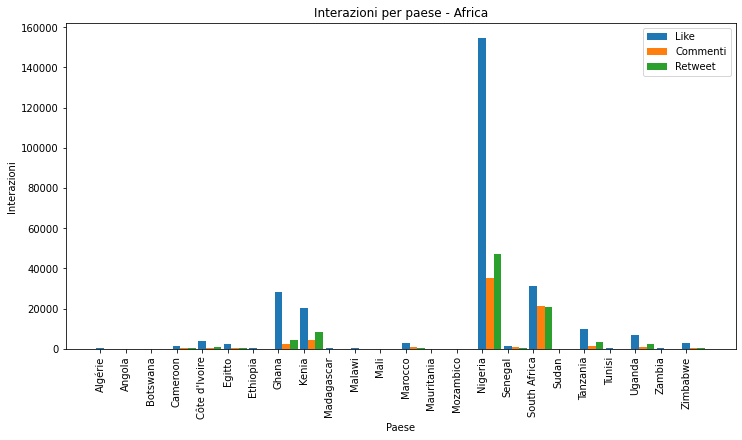

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

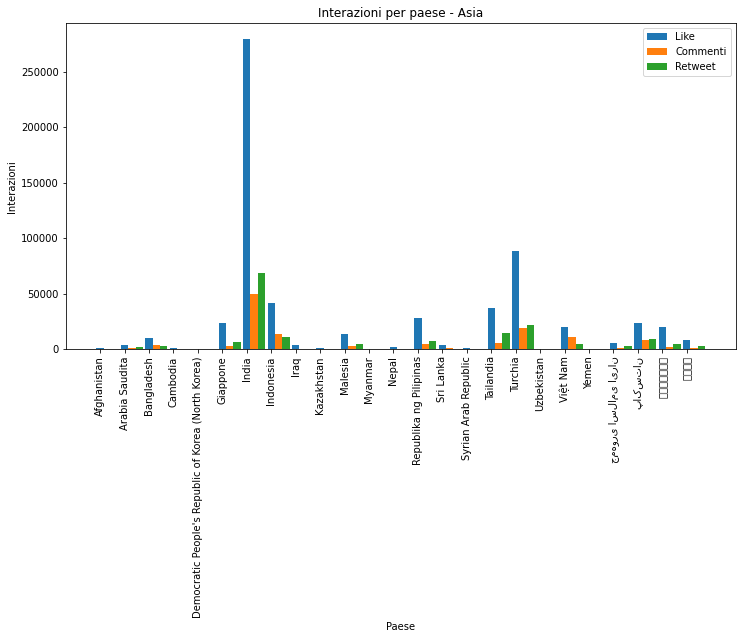

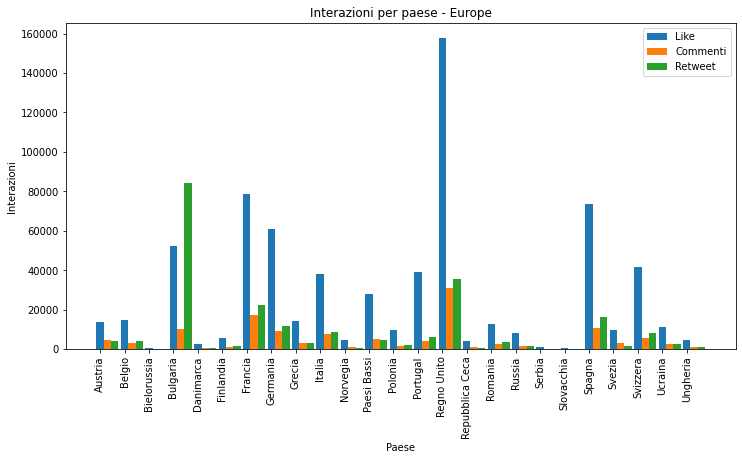

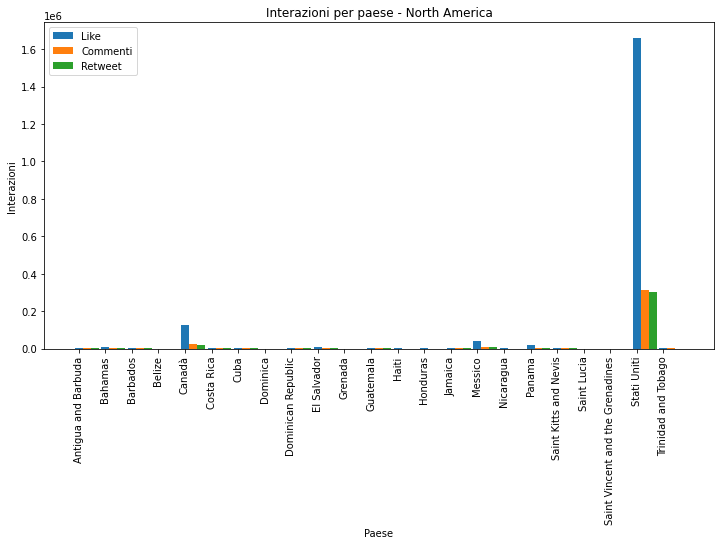

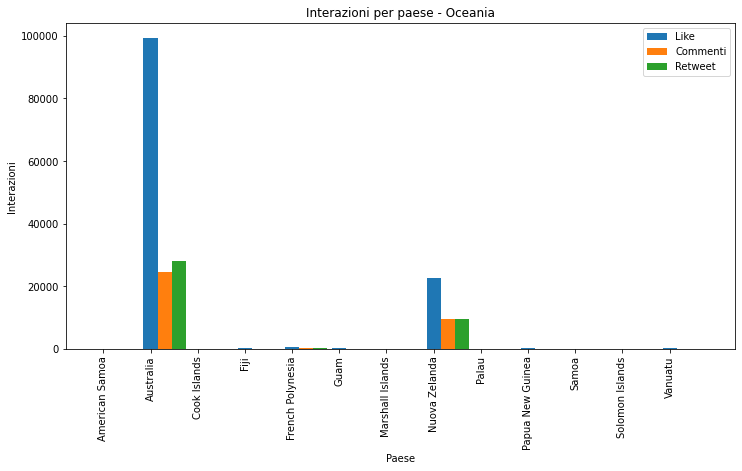

In [14]:
# Suddivisione del dataset per continente
df['Continent'] = df['geo.country_code'].map(inverted_mapping)
grouped = df.groupby('Continent')

for continent, data in grouped:
    # Suddivisione del dataset per paese all'interno del continente corrente
    country_grouped = data.groupby('geo.country')

    # Calcolo delle somme dei like, commenti e retweet per ogni paese nel continente
    likes_sum = country_grouped['public_metrics.like_count'].sum()
    reply_sum = country_grouped['public_metrics.reply_count'].sum()
    retweet_sum = country_grouped['public_metrics.retweet_count'].sum()

    # Creazione delle posizioni delle barre per il grafico
    bar_width = 0.3
    index = np.arange(len(likes_sum.index))

    # Creazione del grafico a barre raggruppate
    plt.figure(figsize=(12, 6))
    plt.bar(index, likes_sum.values, width=bar_width, label='Like')
    plt.bar(index + bar_width, reply_sum.values, width=bar_width, label='Commenti')
    plt.bar(index + 2 * bar_width, retweet_sum.values, width=bar_width, label='Retweet')

    # Configurazione del grafico
    plt.title(f'Interazioni per paese - {continent}')
    plt.xlabel('Paese')
    plt.ylabel('Interazioni')
    plt.xticks(index, likes_sum.index,rotation='vertical')
    plt.legend()

    # Visualizzazione del grafico per il continente corrente
    plt.show()


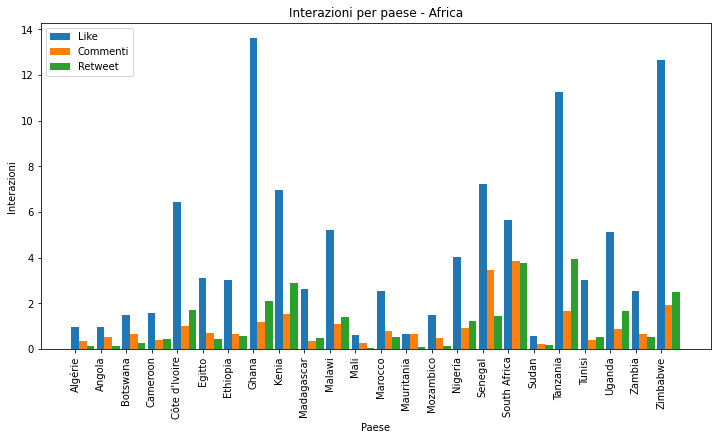

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

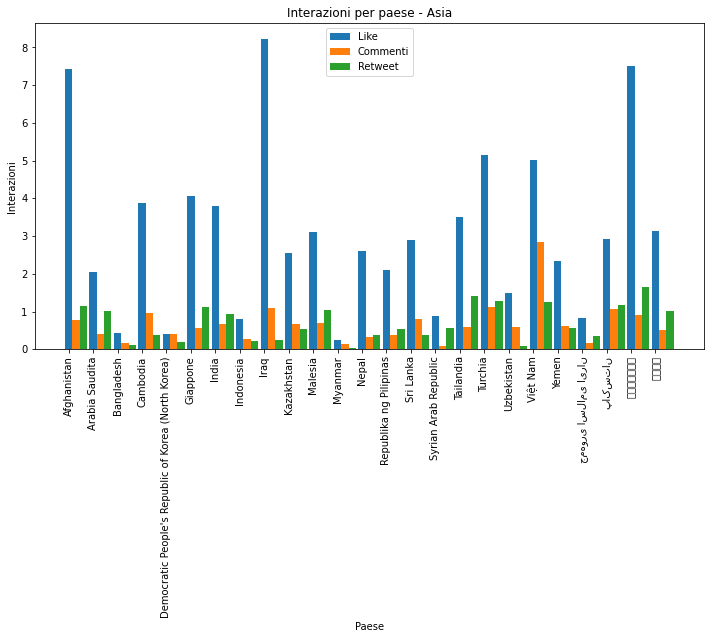

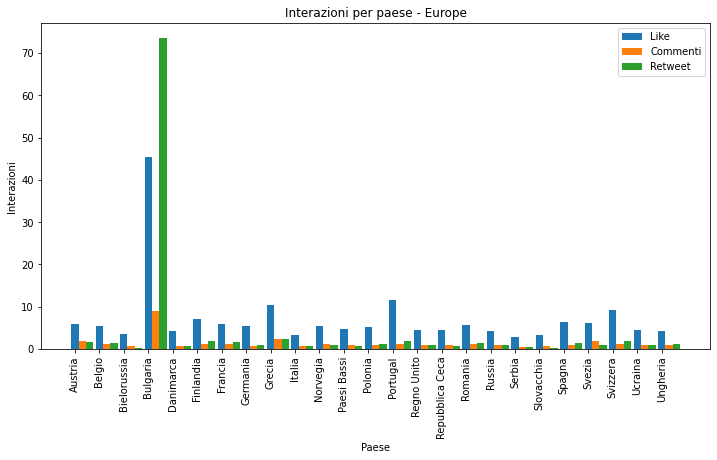

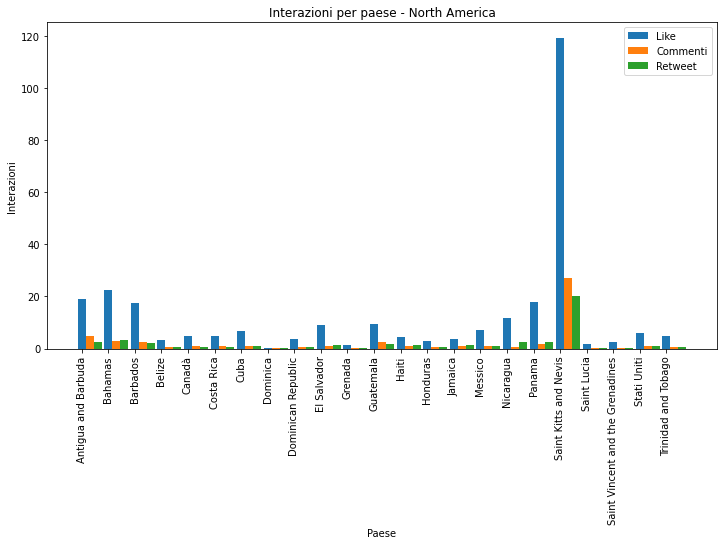

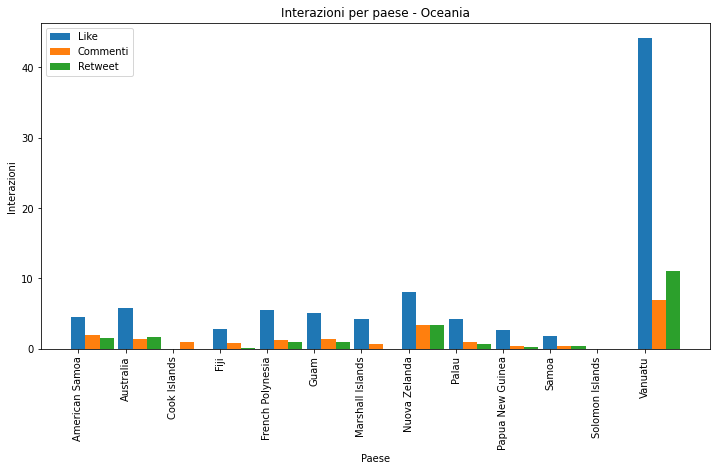

In [6]:
# Suddivisione del dataset per continente
grouped = df.groupby('Continent')

for continent, data in grouped:
    # Suddivisione del dataset per paese all'interno del continente corrente
    country_grouped = data.groupby('geo.country')

    # Calcolo delle somme dei like, commenti e retweet per ogni paese nel continente
    likes_sum = country_grouped['public_metrics.like_count'].mean()
    reply_sum = country_grouped['public_metrics.reply_count'].mean()
    retweet_sum = country_grouped['public_metrics.retweet_count'].mean()

    # Creazione delle posizioni delle barre per il grafico
    bar_width = 0.3
    index = np.arange(len(likes_sum.index))

    # Creazione del grafico a barre raggruppate
    plt.figure(figsize=(12, 6))
    plt.bar(index, likes_sum.values, width=bar_width, label='Like')
    plt.bar(index + bar_width, reply_sum.values, width=bar_width, label='Commenti')
    plt.bar(index + 2 * bar_width, retweet_sum.values, width=bar_width, label='Retweet')

    # Configurazione del grafico
    plt.title(f'Interazioni per paese - {continent}')
    plt.xlabel('Paese')
    plt.ylabel('Interazioni')
    plt.xticks(index, likes_sum.index,rotation='vertical')
    plt.legend()

    # Visualizzazione del grafico per il continente corrente
    plt.show()
